# Reinforcement Learning 
A computational model of reinforcement learning for a simple Gridworld Problem

```
  ____    ____     ____   ____
  ____    ____     ____   ____

|| s00  |  s01  |  s02 | s03 ||
  ____    ____     ____   ____
    
|| s04  |  s05  |  s06 | s07 ||
  ____    ____     ____   ====
  
|| s08  |  s09  |  s10 | s11 ||
  ____    ____     ====   ____
   
|| s12  |  s13  |  s14 | s15 ||
  ____    ____     ____   ____
  ____    ____     ____   ____
```

 - Agent starts in s0 and can chose from 4 different actions (up, down, left, right).
 
 - Reward is only delivered in final state 15.
 
 - || (horizontal & vertical) indicates non-permeable wall
 - | (horizontal & vertical) indicates permeable wall
 
 <br>
 <br>
 Course: Cognitive Modelling (4032COGNMY)  <br>
 Author: Franz Wurm <f.r.wurm@fsw.leidenuniv.nl> <br>
 Date: Sept. 2021

### Load packages

In a first step we should load important packages

In [124]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}".format(x)}) #print float values with 1 decimal

### Set parameters

Here we set the framework for our simulation and the agent(s)

In [125]:
nTrial = 50 #specify how many times you want to run the q-learning function
nAgent = 50

method = 'egreedy' #options: greedy | egreedy | softmax

alpha = 0.1 #learning rate
beta = 1 #inverse temperature
gamma = 1 # discounting factor
epsilon = 0.1 #parameter for ε-greedy action selection

### Initialize variables

Here we define important variables (e.g. the start and goal state of the environment)

In [127]:
actions = np.array(['up', 'left', 'down', 'right'])

s_0 = 0 #start state
s_terminal = 15 #final state (goal)

envsize = 4 #size of the environment (n x n)
iZ = 0
states= np.empty([envsize,envsize],dtype=float)
for iY in range(envsize):
    for iX in range(envsize):
        states[iY][iX] = iZ
        iZ +=1
#print('states')
#print(states)        

movecounter = np.empty([nTrial,nAgent] )

### Helper function

Some computational steps have to be performed multiple times.
Here we define those function so we can call them later on in the script.

In [146]:
def move1step(instate,action):
    
    coords = list(np.where(states == instate))
    
    if (action == 'up'):
        coords[0] -= 1
    if (action == 'down'):
        coords[0] += 1
    if (action == 'left'):
        coords[1] -= 1
    if (action == 'right'):
        coords[1] += 1
        
    if (coords[0] < 0):
        coords[0] = 0
    if (coords[1] < 0):
        coords[1] = 0 
    if (coords[0] >= envsize):
        coords[0] = envsize-1    
    if (coords[1] >= envsize):
        coords[1] = envsize-1
        
    outstate = states[coords[0],coords[1]]   
    return(outstate)  

def getReward(state1,state2):
    if (state2 == s_terminal):
        reward = 10 #final reward at the end of the run
    else:
        reward = 0 #intermediate reward (after each action) 
    if (state1 == state2):
        reward = 0 #reward for running into a wall?
    return reward    

### Start of simulation

Now that we have defined the agent and the environment, we can start the simulation

In [147]:
print('Agent')
for iA in range(nAgent):
    
    print(iA, end=' ')
    Q = np.zeros([len(actions),envsize,envsize] )

    #print('initial Q matrix:\n' + str(Q) + '\n')
    Q0 = deepcopy(Q)

    for iT in range(nTrial): # loop for the different runs
        #if (iT % 100) == 0:
            #print(iT)
        state = s_0
        moves = 0
        while (state != s_terminal): # loop within one run
        
            coord0 = np.where(states == state)

            qvals = Q[:,coord0[0],coord0[1]]
              
            # select action using choice rules
            if (method == 'softmax'):
                pvals = np.exp(beta*qvals)/np.sum(np.exp(beta*qvals))
                action = np.random.choice(actions,size = 1, p = pvals.flatten())            
            elif (method == 'greedy'):
                choices = np.array(qvals == np.max(qvals))
                action = np.random.choice(actions[choices.flatten()])            
            elif (method == 'egreedy'):
                if (np.random.random() < epsilon):
                    action = np.random.choice(actions, size = 1)
                else:
                    choices = np.array(qvals == np.max(qvals))
                    action = np.random.choice(actions[choices.flatten()])
            else:
                action = np.random.choice(actions)
        
            # interact with environment
            next_state = move1step(state,action)
            #print('next state: '+str(next_state))
            reward = getReward(state,next_state)
        
            actionidx = (action==actions)
            coord1 = np.where(states == next_state) 
        
            # update expectations using learing rules
            Q[actionidx,coord0[0],coord0[1]] = Q[actionidx,coord0[0],coord0[1]] + alpha * (reward + gamma * np.max(Q[:,coord1[0],coord1[1]]) - Q[actionidx,coord0[0],coord0[1]])
        
            if ((iT == 0) and (next_state == s_terminal)):
                #print('Q matrix before first successful run:\n' + str(Q) + '\n')
                Q1 = deepcopy(Q)
        
            # update variables
            state = next_state
            moves += 1
        
        #end of while loop
        movecounter[iT,iA] = moves
    #end of trial for loop
    #print('final Q matrix:\n' + str(Q) + '\n')
    Q2 = deepcopy(Q)
#end of agent for loop
print('\n\nFinal Q(s,a) for agent '+str(iA))
print(Q)

Agent
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

Final Q(s,a) for agent 49
[[[0.0 0.0 0.0 0.0]
  [0.0 0.0 0.1 0.0]
  [0.0 0.0 0.0 0.0]
  [0.0 0.0 0.0 0.0]]

 [[0.0 0.0 0.0 0.0]
  [0.0 0.5 0.2 0.0]
  [0.0 0.0 0.0 0.0]
  [0.0 0.0 0.0 0.0]]

 [[3.1 0.0 1.9 0.0]
  [0.0 0.0 8.5 0.0]
  [0.0 0.4 9.5 1.9]
  [0.0 0.2 0.0 0.0]]

 [[0.0 0.1 0.0 0.0]
  [4.9 6.7 0.0 0.0]
  [0.0 0.0 0.1 0.0]
  [0.0 2.9 9.9 0.0]]]


### Plotting performance

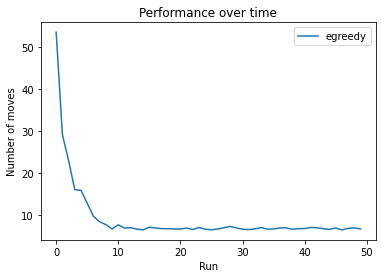

In [143]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.

xdata = range(nTrial)
ydata = np.mean(movecounter,axis=1)

ax.plot(xdata, ydata, label = method)  # Plot some data on the axes.

ax.set_title('Performance over time')
ax.set_xlabel('Run')
ax.set_ylabel('Number of moves')
ax.legend()

In [139]:
print(movecounter[49,:])

[6.0 8.0 6.0 6.0 6.0 6.0 7.0 6.0 8.0 18.0 6.0 6.0 10.0 6.0 6.0 8.0 7.0 8.0
 6.0 9.0 9.0 6.0 8.0 10.0 9.0 15.0 7.0 6.0 6.0 6.0 6.0 10.0 6.0 8.0 6.0
 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 6.0 7.0 6.0 7.0 6.0 6.0 8.0]


In [148]:
#Q2_0 = np.reshape(np.zeros([6,1]),[3,2])

#Q2 = np.zeros([6,1])
#Q2test = np.zeros([6,1])
#idx = [0, 5, 1, 4, 2, 3]

Qmat0 = np.mean(Q0,axis=0)
Qmat1 = np.mean(Q1,axis=0)
Qmat2 = np.mean(Q2,axis=0)



#for i in range(6):
#    Q2[i] = Qmat1[idx[i]]  
#    Q2test[i] = Qmat2[idx[i]]  
#Q2_test = np.reshape(Q2test,[3,2])
#Q2_1 = np.reshape(Q2,[3,2])

print(Qmat0)
print(Qmat1)
print(Qmat2)


[[0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0]]
[[0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.2]
 [0.0 0.0 0.0 0.0]]
[[0.8 0.0 0.5 0.0]
 [1.2 1.8 2.2 0.0]
 [0.0 0.1 2.4 0.5]
 [0.0 0.8 2.5 0.0]]


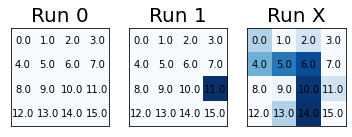

In [149]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)

layout = [['s0', 's5/6'], ['s1', 's4'], ['s2', 's3']]

min_val, max_val = -1, 10

for i in range(envsize):
    for j in range(envsize):
        ax1.text(i, j, str(states[j][i]), va='center', ha='center',size=10)
        ax2.text(i, j, str(states[j][i]), va='center', ha='center',size=10)
        ax3.text(i, j, str(states[j][i]), va='center', ha='center',size=10)
ax1.matshow(Qmat0, cmap=plt.cm.Blues)  
ax2.matshow(Qmat1, cmap=plt.cm.Blues)
ax3.matshow(Qmat2, cmap=plt.cm.Blues)

ax1.axes.xaxis.set_visible(False)
ax1.axes.yaxis.set_visible(False)
ax2.axes.xaxis.set_visible(False)
ax2.axes.yaxis.set_visible(False)
ax3.axes.xaxis.set_visible(False)
ax3.axes.yaxis.set_visible(False)

ax1.title.set_text('Run 0')
ax1.title.set_size(20)
ax2.title.set_text('Run 1')
ax2.title.set_size(20)
ax3.title.set_text('Run X')
ax3.title.set_size(20)


### Plotting policy

Following Sutton & Barto (2018), a policy "defines the learning agent's way of behaving at a given time", i.e. the mapping between states and actions.

In [150]:
index_max = np.argmax(Q2,axis=0)
print(index_max)

[[2 3 2 0]
 [3 3 2 0]
 [3 2 2 2]
 [0 3 3 0]]


# Questions

How could we make the RL model converge faster to the best course of actions?
- learning rule?
- choice rule?
- environment

# Tips and tricks

1. Print important variables using the `print()` function (e.g., Q)
2. Or even better: plot it!
2. If you dont know a function, try the ? (e.g., `np.array?`)
